Practice from @towards data science
######
Problem: Given the marketing budget spent (in thousands of dollars) by a media-services provider in the last 8 months along with the number of new subscribers (also in thousands) for the same time in the table given below:

![alt text](https://miro.medium.com/max/486/1*xFC2yO9Tm6nWvOd4azTSFQ.png)

Here, a trend or relationship between the amount spent and new subscribeers gained. As the amount is increasing, the number of new subscribers is also increasing.
As follow the linear equation:  Subcribers gained = 2 * Amount Spent + 40  

Find this relationship between the amount spent on marketing and the number of subscribers gained using Machine-Learning technique.


Machine Learning terminology:
#Feature: Feature is input which is one column of the data in input set. here, marketing budget.
#Label: Label is output which is final choice. here, number of new subscribers gained

Model: A mathematical representation of a real-world process. In machine Learning a model is an artifact or entity which is created by using a class of algorithm and training it with Features and labels.

In [0]:
#imports require library
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import numpy as np
import matplotlib.pyplot as plt


In [36]:
#Generate/Import the set of Data-Points
marketing_budget_data = np.array([60, 80, 100, 30, 50, 20, 90, 10], dtype = float)
subscribers_gained_data = np.array([160, 200, 240, 100, 140, 80, 220, 60], dtype = float)
for i,c in enumerate(marketing_budget_data):
  print("Marketing Budget = {} , New Subscribers Gained = {}".format(c, subscribers_gained_data[i]))


Marketing Budget = 60.0 , New Subscribers Gained = 160.0
Marketing Budget = 80.0 , New Subscribers Gained = 200.0
Marketing Budget = 100.0 , New Subscribers Gained = 240.0
Marketing Budget = 30.0 , New Subscribers Gained = 100.0
Marketing Budget = 50.0 , New Subscribers Gained = 140.0
Marketing Budget = 20.0 , New Subscribers Gained = 80.0
Marketing Budget = 90.0 , New Subscribers Gained = 220.0
Marketing Budget = 10.0 , New Subscribers Gained = 60.0


<function matplotlib.pyplot.show>

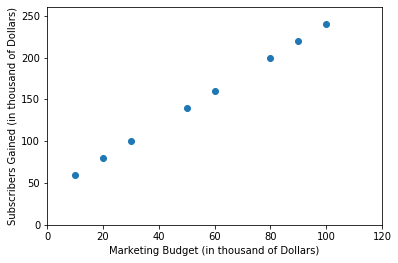

In [37]:
#visualize the data using Matplotlib
plt.scatter(marketing_budget_data, subscribers_gained_data)
plt.xlim(0,120)
plt.ylim(0,260)
plt.xlabel("Marketing Budget (in thousand of Dollars)")
plt.ylabel("Subscribers Gained (in thousand of Dollars)")
plt.show


Principle assumption of Linear Regression: There must be a linear relationship between labels and Coefficients of the equation of line fitted.

#Next step is to separate our data into training and testing Data. Training Data is used to train our model while testing data will be kept separately and later used for verifying the performance of our model by comparing the actual Label of our test data with label predicted by our model for test data.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(marketing_budget_data, subscribers_gained_data, random_state=42, train_size = 0.8, test_size = 0.2)

The problem is straightforward, this network will require only a single layer, with a single neuron

input_shape=[1]: This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, the input shape is the input shape of the entire model. The single value is a floating-point number, representing marketing_budget.

units=1: This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model’s output — a single float value representing new subscribers gained. (In a multi-layered network, the size and shape of the layer would need to match the `input_shape` of the next layer.)

In [0]:
layer_0 = tf.keras.layers.Dense(units=1, input_shape=[1])
#create model
model = tf.keras.Sequential([layer_0])
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])


In [0]:
#Compile the model, with loss(measured difference) and optimizer(reduce the loss) functions
model.compile(loss="mean_squared_error", optimizer= tf.keras.optimizers.Adam(.01))

In [41]:
#Train the model by calling the fit method
#The epochs argument specifies how many times this cycle should be run, and the verbose argument controls how much output the method produces.
trained_model = model.fit(X_train, y_train, epochs= 1000, verbose=False)
print("Finished the training model")

Finished the training model


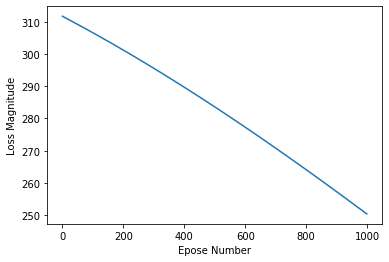

In [43]:
import matplotlib.pyplot as plt
plt.xlabel("Epose Number")
plt.ylabel("Loss Magnitude")
plt.plot(trained_model.history["loss"])

In [44]:
#used model to predict values
print(model.predict([80.0]))
#correct answer 80 * 2 + 40 = 200, so our model is doing really well value nearly 200 to 201
print(model.predict([10.0]))
print(model.predict([50.0]))
print(model.predict([90.0]))
print(model.predict([60.0]))
print(model.predict([100.0]))
print(model.predict([30.0]))

[[202.69849]]
[[31.808052]]
[[129.45973]]
[[227.1114]]
[[153.87265]]
[[251.52432]]
[[80.63389]]


In [55]:
y_pred = model.predict(X_text)
print("Actual Values\t Predicted Values")
print(y_test," ",y_pred.reshape(1,-1))

Actual Values	 Predicted Values
[200.  80.]   [[202.69849  56.22097]]


In [56]:
#Verifying the Model accuracy using Performance Metric
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)     #r-squared value

0.9204549876542862

In [57]:
#if we create a new model with 3 more Dense layers with different units
l_0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l_1 = tf.keras.layers.Dense(units=5)
l_2 = tf.keras.layers.Dense(units=1) 
model = tf.keras.Sequential([l_0, l_1, l_2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(X_train,y_train, epochs=2000,verbose=False)
print('\n Finished training Model')


 Finished training Model


In [65]:
print(model.predict([80]))
y_pred= model.predict(X_text)
print(r2_score(y_test, y_pred))

[[200.]]
1.0
